In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import os


current_dir = os.getcwd()
phrase = "QuantitativeFinance"
target_path = current_dir.split(phrase)[0] + phrase
os.chdir(target_path)
print(os.getcwd())

np.set_printoptions(suppress=True)

from functions import generate_gbm_paths, generate_money_market_numeraire_paths

%load_ext autoreload
%autoreload 2


c:\OneDrive\Pulpit\QuantitativeFinance
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### **Sources**

- Hull J. C., Options, Futures, and other derivatives
- https://en.wikipedia.org/wiki/Martingale_(probability_theory)
- https://www.youtube.com/watch?v=MhmZaHWGWHc&list=PL6zzGYGhbWrPaI-op1UfNl0uDglxdkaOB&t=1143s
- https://en.wikipedia.org/wiki/Martingale_pricing
- https://www.linkedin.com/pulse/from-real-risk-neutral-world-mastering-measure-changes-ochynski-zidce/


### **Measure**

It is the unit in which securities prices are valued. 


### **$\mathbb{P}$ - real-world probability measure**


A real-world probability measure (P-measure) reflects the actual, historical likelihood of events, incorporating risk premia and market dynamics, unlike the risk-neutral measure (Q-measure) used in finance for pricing derivatives. It's derived from observed data and statistical models, predicting future payoffs by discounting expected returns at risk-adjusted rates, essentially telling you the true chance an event happens, like a company defaulting or customer traffic at a store. <br>

**Key Characteristics**
- **Based on History** <br>
Derived from actual data, observations, and statistical modeling of past events.

- **Includes Risk Premiums** <br>
Assumes investors require higher returns for taking on more risk, meaning expected returns can exceed the risk-free rate.

- **Applications** <br>
Used for general forecasting, risk measurement (like default probabilities), and understanding real market behavior. 

**Comparison with Risk-Neutral Probability (Q-Measure)**
- **P-Measure (Real World)**  <br>
Reflects reality; assets earn expected returns above the risk-free rate due to risk.

- **Q-Measure (Risk-Neutral)** <br>
An artificial measure where all assets grow at the risk-free rate, simplifying derivative pricing by removing risk premiums.

- **Transition** <br>
Mathematical tools (like Girsanov's Theorem) allow switching between these measures, ensuring theoretical consistency. 

**In Practice**
- A grocery store uses the P-measure to estimate a 75% chance of over 800 customers, based on past traffic.
- In finance, the P-measure helps assess a company's actual default risk, while the Q-measure helps price options on that company's stock

### **$\mathbb{Q}$ - risk-neutral probability measure** <br>


A risk-neutral probability measure is a mathematical tool in finance that adjusts real-world probabilities to price derivatives, assuming investors are indifferent to risk (risk-neutral) by making all assets earn the risk-free rate, allowing for simpler, arbitrage-free valuation of options and other financial instruments, forming the basis of models like Black-Scholes. It's also called an equivalent martingale measure, simplifying pricing by ensuring discounted asset prices become martingales, effectively removing risk aversion from calculations. It is theoretical measure. Its existence relies on the fundamental theorem of asset pricing, which states that in a complete, arbitrage-free market, a unique risk-neutral measure exists.

**Key Concepts:**
- **Artificial Measure**  <br>
It's a theoretical probability distribution, not the actual real-world one (physical measure).

- **Risk-Free Return**  <br>
Under this measure, all assets, including risky ones, are assumed to grow at the risk-free interest rate.

- **Martingale Property**  <br>
The discounted price of any asset, under the risk-neutral measure, is a martingale, meaning its expected future value (discounted) is its current value.

- **Arbitrage-Free Markets** <br>
Its existence relies on the fundamental theorem of asset pricing, which states that in a complete, arbitrage-free market, a unique risk-neutral measure exists. 

**How It Works:**
- **Adjust Probabilities** <br>
Real-world probabilities are adjusted to reflect risk preferences, creating risk-neutral probabilities $p^{*}$. 

- **Calculate Expected Payoff** <br>
The derivative's future payoff is calculated using these $p^{*}$ probabilities.

- **Discount** <br> 
This expected payoff is then discounted back to the present using the risk-free rate, giving the derivative's fair price

**Why It's Used:**
- **Simplified Pricing** <br>
It makes derivative pricing consistent and tractable, as you don't need to model complex investor risk aversion.

- **Fundamental to Models** <br> 
It's the backbone of modern derivative pricing, including Black-Scholes and binomial models.

- **Unifies Valuation** <br>
Under this measure, the price of any asset (or derivative) is simply the discounted expected value of its future payoff

### **Market price of risk**

It is the extra return (risk premium) that investors demand to take on risk, essentially the reward for bearing volatility. It reflects how much compensation is needed for taking on uncertainty (like interest rate, currency, or equity risk) and is crucial for pricing assets and understanding market sentiment, being a key component in finance models.

Excess return over risk-free rate earned by any derivative in a short period of time is linearly related to the **market price of risk** of the underlying stochastic variable. In traditional risk-neutral world this market price of risk is assumed to be zero. 


Let's start with consideration of properties if derivatives dependent on the value of a single variable $\theta$, that follows the process:

$\Delta \theta = m dt + s dz$<br>
where $dz$ is a Wiener process, $m$ is expected growth rate in $\theta$ and $s$ is a volatility of $\theta$. We assume that $m$ and $s$ depend only on $\theta$ and time $t$


Assuming $f$ as derivative (option, forward, etc. and it does not provide income) price dependent only on $\theta$ and $t$ ($\mu$ and $\sigma$ are functions of $\theta$ and $t$) where:

$\Delta f = \mu dt + \sigma dz$

then:

$\frac{\mu - r}{\sigma} = \lambda$

$\lambda$ is **market price of risk** of $\theta$. It can be dependent on $\theta$ and $t$ (as $\mu$ and $\sigma$ are functions of $\theta$ and $t$), but is not dependent on the neture of a derivative $f$. For no arbitrage, $\frac{\mu - r}{\sigma}$ must be the same for all derivatives that are dependent only on $\theta$ and $t$. It is not dependent on $m$, only on $\mu$ of the derivative $f$.


##### **More than one stochastic component case**

When derivative price $f$ depends on more than one stochastic component (there are $n$ variables $\theta_1$, ..., $\theta_n$), with use of Ito's lemma we can show that the process of price of $f$ that is dependent on the n $\theta_i$ stochastic components can be written as:

$\Delta f$ = $\mu dt$ + $\sum{\sigma_i dz_i}$

Where $\mu$ is expected return from security and $\sigma_i dz_i$ is the component of the risk of this return attritutable to $\theta_i$. Both $\mu$ and $\sigma_i$ are potentially dependent on the $\theta_i$ and time $t$

In this case, 
$\mu-r$ = $\sum{\lambda_i\sigma_i}$ where $\lambda_i$ is market price of risk for $\theta_i$.

When:
- $\lambda_i\sigma_i$ = 0 - no effect on expected return <br>
- $\lambda_i\sigma_i$ > 0 - investors require a higher return to compensate the risk related to $\theta_i$<br>
- $\lambda_i\sigma_i$ < 0 - investors require a lower return to compensate the risk related to $\theta_i$, this situation occurs when the variable has the effect of reducing rather than increasing the risks in the portfolio<br>


In [ ]:
# # TODO: co by się stało gdyby lambda nie była taka sama dla wszystkich derywatów? Dlaczego zachodzi arbitraż?


The market price of risk of $\theta$ measures the trade-off between risk and return that are made for securities dependent on $\theta$. 

We can present the equation in a following way: $\mu$ - $r$ = $\lambda\sigma$

Then it shows that expected return to compensate for risk $\sigma\lambda$ is $\mu$ - $r$, where $\sigma$ can be interpreted as the quantity of $\theta$-risk present in $f$


It was assumed that price follows $\Delta f$ = $\mu fdt$ + $\sigma fdz$ where $\mu$ value depends on risk preferences of investors ($\mu$ = $r$ + $\lambda\sigma$). In a **traditional risk-neutral world** $\lambda$=0. We can make other assumptions about market price of risk that enables us to assume other worlds that are internally consistent to be defined, so that $\Delta f$ = $(r + \lambda\sigma) fdt$ + $\sigma fdz$

As we move from one market price of risk to another, the expected growth rates of security prices change, but their volatilities stays the same (**Girsanov's theorem**). Choosing particular market price of risk is also reffered as defining **probability measure**.


### **Martingale**

It is a stochastic process that does not have drift. Its expected value of the next observation, given all prior observations, is equal to the most recent value. In other words, the conditional expectation of the next value, given the past, is equal to the present value. A discrete-time martingale is a discrete-time stochastic process (a sequence of random variables) $X_1$, $X_2$, $X_3$, ... that satisfies for any time $n$:

- $\mathbb{E}(X_n) < \infty$
- $\mathbb{E}(X_n | X_1, X_2, ..., X_{n-1}) = X_{n-1}$

Alternatively, variable $\theta$ is martingale if its process follows: <br>
$\Delta\theta$ = $\sigma dz$, where: <br>
- $dz$ is a Wiener process
- $\sigma$ may be stochastic, it can depend on $\theta$ and other stochastic variables

Martingale has a property that $\mathbb{E}(\theta_T)$ = $\theta_0$. Over every small interval the change in $\theta$ is normally distributed with mean of 0. The change in $\theta$ between time 0 and time T is the sum of its changes over many small time intervals. It follows that the expected change in $\theta$ between time $0$ and time $T$ must also be 0.


### **Equivalent martingale measure result**

If we use the price of a traded security as the unit of measurement then there is a market price of risk for which all security prices follow martingales.



Suppose that we have $f$ and $g$ prices of traded securities that depend on the same source of uncertainty and that these securities provide no income during the time of consideration. Define $\phi$ = $f/g$. $\phi$ is a relative price of $f$ with respect to $g$. It can be interpreted that the price of $f$ is measured in units $g$ instead of dollars. $g$ is so-called **numeraire**. The **equivalent martingale measure** result shows that when there are no arbitrage opportunities, $\phi$ is a martingale for some choice of market price of risk. When market price of risk is set to be the volatility of $g$, the $\phi$ is a martingale for all security prices $f$. 


In [96]:

# TODO: check what happens to equivalent martingale measure when there are arbitrage opportunities


To illustrate equivalent martingale measure results, let's define two processes with market price of risk equal to $\sigma_g$: <br>

$df$ = $(r + \sigma_g\sigma_f)fdt$ + $\sigma_f fdz$ <br>
$dg$ = $(r + \sigma_g^2)gdt$ + $\sigma_g gdz$



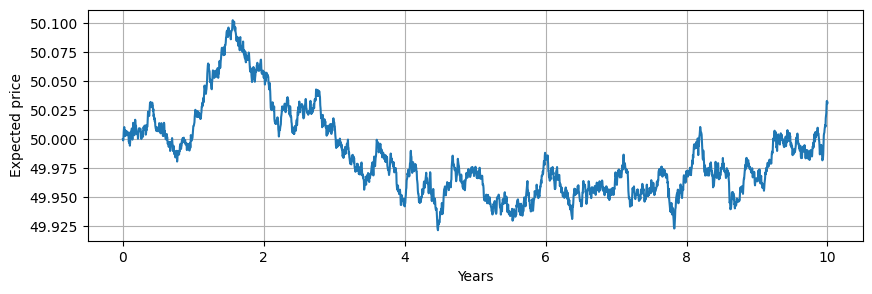

In [6]:
r = 0.03
T = 10.0
time_step_num = 252 * T
paths_num = 10000
normal_dist_vars = np.random.normal(0, 1, (paths_num, int(time_step_num)))  # the same source of uncertainty

f_0 = 50
sigma_f = 0.2

g_0 = 75
sigma_g = 0.3

market_price_of_risk = sigma_g

# # df
paths_f  = generate_gbm_paths(f_0, T, r + sigma_f * market_price_of_risk, sigma_f, int(time_step_num), paths_num, normal_dist_vars=normal_dist_vars)
# dg
paths_g = generate_gbm_paths(g_0, T, r + sigma_g*market_price_of_risk, sigma_g, int(time_step_num), paths_num, normal_dist_vars=normal_dist_vars)

# When source of uncertainty is not the same, f/g is not a martingale
# paths_f  = generate_gbm_paths(f_0, T, r + sigma_f * market_price_of_risk, sigma_f, int(time_step_num), paths_num, normal_dist_vars=None)
# paths_g = generate_gbm_paths(g_0, T, r + sigma_g*market_price_of_risk, sigma_g, int(time_step_num), paths_num, normal_dist_vars=None)


# As f_0 / g_0 = E_g(f_T / g_T)   ->   f_0 = g_0 * E_g(f_t / g_T), where E_g denotes expectations in a world defined by numeraire g
f_0_arr = g_0 * np.mean(paths_f / paths_g, axis=1)

x_axis = np.linspace(0, T, int(time_step_num) + 1)
plt.figure(figsize=(10, 3))
plt.plot(x_axis, f_0_arr)
plt.ylim(f_0 - 5, f_0 + 5)
plt.grid()
plt.xlabel('Years')
plt.ylabel('Expected price')
plt.show()

# Plot looks like a plot for a martingale


Let's asssume that our numeraire is money market account: <br>

$dg$ = $rgdt$

The volatility is assumed to be zero as we assume that there is risk-free rate $r$ in specified time horizon, so there is no source of uncertainty in our example. However, this approach allows us to make interest rate stochastic and volatile e.g. for interest rate derviatives pricing.

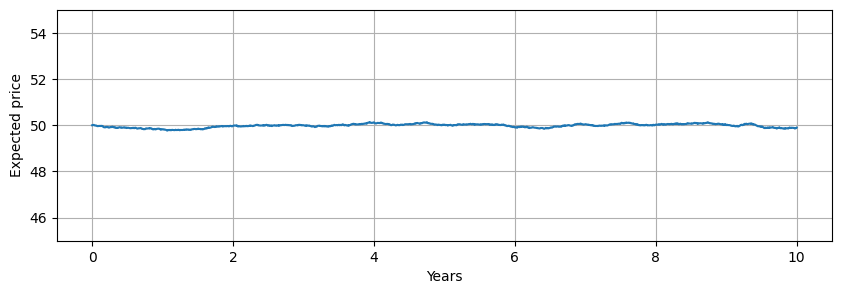

In [ ]:
r = 0.1
T = 10.0
time_step_num = 252 * T
paths_num = 10000
normal_dist_vars = np.random.normal(0, 1, (paths_num, int(time_step_num)))  # the same source of uncertainty

f_0 = 50
sigma_f = 0.2

g_0 = 1  # as it is today, exp(r*dt) -> exp(r*0) = 1
sigma_g = 0.0  # r is assumed to be constant

market_price_of_risk = sigma_g

# generate paths in traditional risk-neutral world (mu = r as sigma_f * market_price_of_risk is 0 here)
# df
paths_f  = generate_gbm_paths(f_0, T, r + sigma_f * market_price_of_risk, sigma_f, int(time_step_num), paths_num, normal_dist_vars=normal_dist_vars)
# dg
paths_g = generate_money_market_numeraire_paths(T, r, int(time_step_num), paths_num)

f_0_arr = g_0 * np.mean(paths_f / paths_g, axis=1)

x_axis = np.linspace(0, T, int(time_step_num) + 1)
plt.figure(figsize=(10, 3))
plt.plot(x_axis, f_0_arr)
plt.ylim(f_0 - 5, f_0 + 5)
plt.xlabel('Years')
plt.ylabel('Expected price')
plt.grid()
plt.show()



**To sum up, pricing in risk-neutral world (under risk-neutural measure) is just a specific case of general framework - pricing with choice of numeraire (equivalent martingale measure), where chosen numeraire is money market account and volatility of numeraire security is zero**

Under this measure price of derivative today $f_0$ = $g_0\mathbb{E}(\frac{f_t}{g_t})$. <br>
As $g_0$=1:

$f_0$ = $\mathbb{E}(e^{-\int_{0}^{T} rdt}f_T)$ in continuous variant

or

$f_0$ = $\mathbb{E}(e^{-\overline{r}T}f_T)$ in discrete variant, where $\overline{r}$ is rate average between 0 and T.

It allows to price derivatives when $r$ is stochastic. In case where $r$ is assumed to be constant, formula reduces to:

$f_0$ = $e^{-rT} \mathbb{E}(f_T)$ which is a definition of risk-neutral relationship




In [ ]:
# TODO: spisać to co Gemini odpowiadało w czacie odnośnie pytań dotyczących znaczenia prawdopodobieństw w Q vs P. Może ta się to 
# zobrazować za pomocą binomial tree i tam powiązać to z martyngałem i dyskontowaniem?

In [ ]:
# Questions:

# 1. Why does risk-neutral drift has to be risk-free rate to avoid arbitrage?
# 2. Why, under risk-neutral measure, all assets earn the same expected rate of return - risk-free rate?
# 3. Why can we not assume returns distributions other than standard normal distribution for modelling stock paths?
  